In this notebook we will analyze the Rosetta dataset:

In [2]:
import os
import pandas as pd
import csv

In [5]:
rosetta_df = pd.read_csv("rosetta_final.csv")
rosetta_df

,index,language,task,domain,subdomain,code
0,6t3p,go,Ascending primes,Mathematics,Number Theory,"package main\n\nimport (\n ""fmt""\n ""rcu""..."
1,cy92,lua,Ascending primes,Mathematics,Number Theory,local function is_prime(n)\n if n < 2 then re...
2,w1e6,perl,Ascending primes,Mathematics,Number Theory,use strict; \nuse warnings;\nuse ntheory qw( i...
3,xawr,python,Ascending primes,Mathematics,Number Theory,from sympy import isprime\n\ndef ascending(x=0...
4,ak1r,bash,Array concatenation,Data Structures & Algorithms,Arrays,"x=(""1 2"" ""3 4"")\ny=(5 6)\nsum=( ""${x[@]}"" ""$..."
...,...,...,...,...,...,...
14577,bp8kx,rust,A+B,Mathematics,Arithmetic,use std::io;\n\nfn main() {\n let mut line ...
14578,aen1n,scala,A+B,Mathematics,Arithmetic,"println(readLine().split("" "").map(_.toInt).sum)"
14579,xqtwq,sql,A+B,Mathematics,Arithmetic,SELECT A+B
14580,hksj0,swift,A+B,Mathematics,Arithmetic,import Foundation\n\nlet input = NSFileHandle....


In [518]:
rosetta_df = rosetta_df.rename(columns={'index': 'code_index'})

In [519]:
rosetta_python = rosetta_df[rosetta_df['language'] == 'python']
rosetta_python

,code_index,language,task,domain,subdomain,code
3,xawr,python,Ascending primes,Mathematics,Number Theory,from sympy import isprime\n\ndef ascending(x=0...
16,8x0o,python,Array concatenation,Data Structures & Algorithms,Arrays,"arr1 = [1, 2, 3]\narr2 = [4, 5, 6]\narr3 = [7,..."
29,5cux,python,ASCII art diagram converter,Programming Concepts,Text Processing,def validate(diagram):\n\n \n\n rawlines...
47,4c5k,python,Array length,Data Structures & Algorithms,Arrays,">>> print(len(['apple', 'orange']))\n2\n>>>"
63,ltcv,python,Arithmetic numbers,Mathematics,Number Theory,"def factors(n: int):\n f = set([1, n])\n ..."
...,...,...,...,...,...,...
14526,inmof,python,2048,Game Development,Puzzles,"import curses\nfrom random import randrange, c..."
14534,z37tt,python,ABC problem,Mathematics,Number Theory,"'''\nNote that this code is broken, e.g., it w..."
14536,clr9q,python,15 puzzle game,Game Development,Puzzles,''' Structural Game for 15 - Puzzle with diffe...
14546,u5evd,python,24 game,Game Development,Puzzles,'''\n The 24 Game\n\n Given any four digits in...


In [520]:
rosetta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14582 entries, 0 to 14581
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code_index  14581 non-null  object
 1   language    14581 non-null  object
 2   task        14581 non-null  object
 3   domain      14477 non-null  object
 4   subdomain   14477 non-null  object
 5   code        13408 non-null  object
dtypes: object(6)
memory usage: 683.7+ KB


In [521]:
rosetta_df.shape

(14582, 6)

In [522]:
rosetta_df.isna().sum()

code_index       1
language         1
task             1
domain         105
subdomain      105
code          1174
dtype: int64

In [523]:
rosetta_df = rosetta_df.dropna()
rosetta_df

,code_index,language,task,domain,subdomain,code
0,6t3p,go,Ascending primes,Mathematics,Number Theory,"package main\n\nimport (\n ""fmt""\n ""rcu""..."
1,cy92,lua,Ascending primes,Mathematics,Number Theory,local function is_prime(n)\n if n < 2 then re...
2,w1e6,perl,Ascending primes,Mathematics,Number Theory,use strict; \nuse warnings;\nuse ntheory qw( i...
3,xawr,python,Ascending primes,Mathematics,Number Theory,from sympy import isprime\n\ndef ascending(x=0...
4,ak1r,bash,Array concatenation,Data Structures & Algorithms,Arrays,"x=(""1 2"" ""3 4"")\ny=(5 6)\nsum=( ""${x[@]}"" ""$..."
...,...,...,...,...,...,...
14577,bp8kx,rust,A+B,Mathematics,Arithmetic,use std::io;\n\nfn main() {\n let mut line ...
14578,aen1n,scala,A+B,Mathematics,Arithmetic,"println(readLine().split("" "").map(_.toInt).sum)"
14579,xqtwq,sql,A+B,Mathematics,Arithmetic,SELECT A+B
14580,hksj0,swift,A+B,Mathematics,Arithmetic,import Foundation\n\nlet input = NSFileHandle....


In [524]:
rosetta_df.isna().sum()

code_index    0
language      0
task          0
domain        0
subdomain     0
code          0
dtype: int64

In [525]:
rosetta_df.nunique()

code_index    13314
language         21
task           1172
domain           16
subdomain       123
code          13104
dtype: int64

Let's focus only on the languages we chose to run the project on:

In [526]:
rosetta_df['language'].unique() == 'python'

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [527]:
rosetta_df = rosetta_df[rosetta_df['language'].isin({'python', 'javascript', 'java', 'go', 'ruby', 'php'})]

In [528]:
rosetta_df.nunique()

code_index    5315
language         6
task          1169
domain          16
subdomain      123
code          5159
dtype: int64

In [529]:
rosetta_df['language'][rosetta_df['language'] == 'python'].count()

1130

In [530]:
code_lengths = rosetta_df['code'].apply(len)
code_lengths.sort_values().head(10)

7531     1
4446     3
8639     3
9151     3
4451     3
1605     4
1583     4
9170     4
9805     4
11055    5
Name: code, dtype: int64

In [531]:
rosetta_df.loc[7531]

code_index                      jnm7c
language                         java
task          Literals/Floating point
domain           Programming Concepts
subdomain                  Data Types
code                                1
Name: 7531, dtype: object

In [532]:
rosetta_df.loc[9170]

code_index                   gqe4q
language                      ruby
task            Hello world/Newbie
domain        Programming Concepts
subdomain                   Output
code                          puts
Name: 9170, dtype: object

In [533]:
rosetta_df.loc[4446]

code_index                   g334h
language                    python
task               Repeat a string
domain        Programming Concepts
subdomain          Text Processing
code                           * 5
Name: 4446, dtype: object

In [534]:
rosetta_df.loc[1572]

code_index                             j5p7p
language                              python
task          Terminal control/Inverse video
domain                  Programming Concepts
subdomain                  System Operations
code                                   print
Name: 1572, dtype: object

In [535]:
rosetta_df.groupby('task').size()

task
100 doors                        6
100 prisoners                    5
15 puzzle game                   6
15 puzzle solver                 1
2048                             6
                                ..
Zero to the zero power           6
Zhang-Suen thinning algorithm    5
Zig-zag matrix                   6
Zumkeller numbers                4
de Bruijn sequences              4
Length: 1169, dtype: int64

In [536]:
# tasks_with_5_rows = rosetta_df.groupby('task').size()
# tasks_with_5_rows = tasks_with_5_rows[tasks_with_5_rows == 5].index
# tasks_with_5_rows = tasks_with_5_rows.tolist()
# len(tasks_with_5_rows)

In [537]:
domains = rosetta_df['domain'].unique()
domains.sort()
domains

array(['Algorithms', 'Biology', 'Data Structures & Algorithms',
       'Databases', 'Finance', 'Game Development',
       'Machine Learning & Data Science', 'Mathematics', 'Music',
       'Networking', 'Programming Concepts', 'Science', 'Security',
       'Testing & Debugging', 'Utilities & Scripts', 'Web Development'],
      dtype=object)

In [538]:
subdomains = rosetta_df['subdomain'].unique()
subdomains.sort()
len(subdomains)

123

In [539]:
tasks = rosetta_df.groupby('task').size().index.tolist()
tasks

['100 doors',
 '100 prisoners',
 '15 puzzle game',
 '15 puzzle solver',
 '2048',
 '21 game',
 '24 game',
 '24 game/Solve',
 '4-rings or 4-squares puzzle',
 '9 billion names of God the integer',
 '99 bottles of beer',
 'A+B',
 'ABC problem',
 'AKS test for primes',
 'ASCII art diagram converter',
 'AVL tree',
 'Abbreviations, automatic',
 'Abbreviations, easy',
 'Abbreviations, simple',
 'Abelian sandpile model',
 'Abelian sandpile model/Identity',
 'Abstract type',
 'Abundant odd numbers',
 'Abundant, deficient and perfect number classifications',
 'Accumulator factory',
 'Achilles numbers',
 'Ackermann function',
 'Active Directory/Connect',
 'Active Directory/Search for a user',
 'Active object',
 'Add a variable to a class instance at runtime',
 'Additive primes',
 'Address of a variable',
 'Algebraic data types',
 'Align columns',
 'Aliquot sequence classifications',
 'Almkvist-Giullera formula for pi',
 'Almost prime',
 'Amb',
 'Amicable pairs',
 'Anagrams',
 'Anagrams/Deranged an

In [540]:
len(tasks)

1169

In [541]:
rosetta_df = rosetta_df[rosetta_df['task'].isin(tasks)]
rosetta_df

,code_index,language,task,domain,subdomain,code
0,6t3p,go,Ascending primes,Mathematics,Number Theory,"package main\n\nimport (\n ""fmt""\n ""rcu""..."
3,xawr,python,Ascending primes,Mathematics,Number Theory,from sympy import isprime\n\ndef ascending(x=0...
7,c69g,go,Array concatenation,Data Structures & Algorithms,Arrays,"package main\n\nimport ""fmt""\n\nfunc main() {"
10,rug0,java,Array concatenation,Data Structures & Algorithms,Arrays,"public static Object[] concat(Object[] arr1, O..."
11,b7ki,javascript,Array concatenation,Data Structures & Algorithms,Arrays,"var a = [1,2,3],\n b = [4,5,6],\n c = a...."
...,...,...,...,...,...,...
14568,m95ym,java,99 bottles of beer,Programming Concepts,Simulations,import java.text.MessageFormat;\n\npublic clas...
14569,vuj25,javascript,99 bottles of beer,Programming Concepts,Simulations,var beer = 99;\nwhile (beer > 0) {\n var vers...
14572,ft2dh,php,A+B,Mathematics,Arithmetic,"fscanf(STDIN, , $a, $b); \necho ($a + $b) . ;"
14574,jhq7p,python,A+B,Mathematics,Arithmetic,try: raw_input\nexcept: raw_input = input\n\np...


In [542]:
rosetta_df['task'].nunique()

1169

In [543]:
# len(tasks_with_5_rows)*5

In [544]:
import tiktoken
import pandas as pd
import matplotlib.pyplot as plt

# Load the tokenizer for the relevant model (e.g., GPT-3.5-turbo)
enc = tiktoken.encoding_for_model("gpt-3.5-turbo")

# Calculate token counts for each code snippet
rosetta_df['token_count'] = rosetta_df['code'].apply(lambda x: len(enc.encode(x)))

# Display token count for each row
print(rosetta_df[['code', 'token_count']])

                                                    code  token_count
0      package main\n\nimport (\n    "fmt"\n    "rcu"...           30
3      from sympy import isprime\n\ndef ascending(x=0...           61
7          package main\n\nimport "fmt"\n\nfunc main() {           11
10     public static Object[] concat(Object[] arr1, O...           73
11     var a = [1,2,3],\n    b = [4,5,6],\n    c = a....           27
...                                                  ...          ...
14568  import java.text.MessageFormat;\n\npublic clas...          150
14569  var beer = 99;\nwhile (beer > 0) {\n  var vers...           82
14572      fscanf(STDIN, , $a, $b); \necho ($a + $b) . ;           22
14574  try: raw_input\nexcept: raw_input = input\n\np...           22
14576                        puts gets.split.sum(&:to_i)            8

[5316 rows x 2 columns]


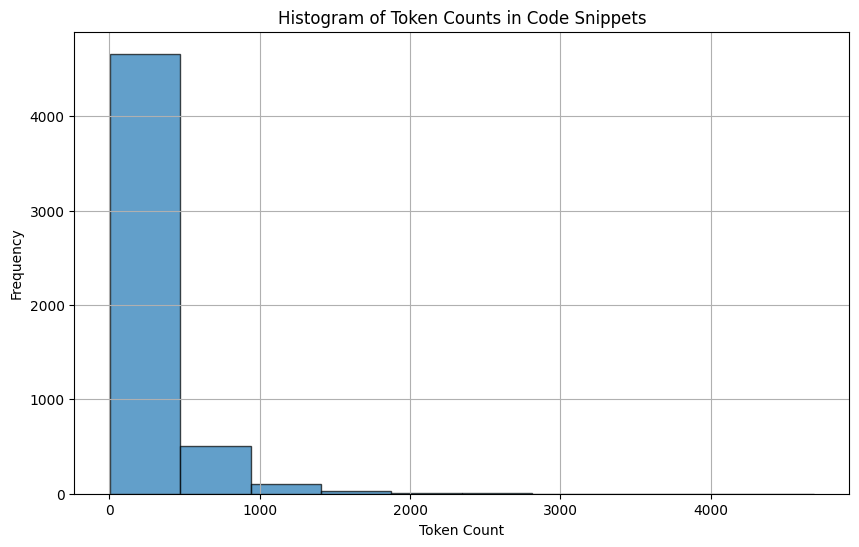

In [545]:
# Plot a histogram of the token counts
plt.figure(figsize=(10, 6))
plt.hist(rosetta_df['token_count'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Token Counts in Code Snippets')
plt.xlabel('Token Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [546]:
rosetta_df = rosetta_df.sort_values(by=['task', 'language'])
rosetta_df

,code_index,language,task,domain,subdomain,code,token_count
351,gx4n,go,100 doors,Game Development,Puzzles,"package main\n\nimport ""fmt""\n\nfunc main() {\...",18
365,1dp2,java,100 doors,Game Development,Puzzles,class HundredDoors {\n public static void m...,118
367,q6x8,javascript,100 doors,Game Development,Puzzles,var doors=[];\nfor (var i=0;i<100;i++)\n do...,92
593,kohv,php,100 doors,Game Development,Puzzles,<?php\nfor ($i = 1; $i <= 100; $i++) {\n\t$roo...,50
618,z4tt,python,100 doors,Game Development,Puzzles,doors = [False] * 100\nfor i in range(100):\n ...,58
...,...,...,...,...,...,...,...
219,e3ax,ruby,Zumkeller numbers,Mathematics,Number Theory,"class Integer\n\n def divisors\n res = [1,...",282
11731,5keul,go,de Bruijn sequences,Mathematics,Combinatorics,"package main\n\nimport (\n ""bytes""\n ""fm...",75
11742,bqik3,java,de Bruijn sequences,Mathematics,Combinatorics,import java.util.ArrayList;\nimport java.util....,468
11755,f9ude,python,de Bruijn sequences,Mathematics,Combinatorics,"def de_bruijn(k, n):\n \n try:\n ...",393


In [547]:
rosetta_df[rosetta_df['language'] == 'php']

,code_index,language,task,domain,subdomain,code,token_count
593,kohv,php,100 doors,Game Development,Puzzles,<?php\nfor ($i = 1; $i <= 100; $i++) {\n\t$roo...,50
14530,wxnep,php,15 puzzle game,Game Development,Puzzles,"<?php\n\n\n\n\nsession_start([\n => 0,\n =...",1549
14521,gra42,php,2048,Game Development,Puzzles,<?php\n\n$game = new Game();\n\nwhile(true) {\...,1695
14452,vux2v,php,21 game,Game Development,Card Games,<!DOCTYPE html>\n<html lang=>\n\n<head>\n <...,1033
14532,089sp,php,24 game,Game Development,Puzzles,The 24 Game\n\nGiven any four digits in the ra...,497
...,...,...,...,...,...,...,...
302,06sp,php,XML/XPath,Web Development,XML Processing,<?php\n\n$doc = DOMDocument::loadXML('<invento...,126
340,tlf1,php,Y combinator,Programming Concepts,Functional Programming,<?php\nfunction Y($f) {\n $g = function($w) u...,170
267,zht1,php,Zeckendorf number representation,Mathematics,Number Theory,"<?php\n$m = 20;\n\n$F = array(1,1);\nwhile ($F...",154
264,n7ig,php,Zero to the zero power,Mathematics,Arithmetic,"<?php\necho pow(0,0);\necho 0 ** 0; \n?>",19


In [548]:
domain_df = rosetta_df.groupby('domain').size().reset_index(name='count')
domain_df

,domain,count
0,Algorithms,182
1,Biology,9
2,Data Structures & Algorithms,229
3,Databases,11
4,Finance,10
5,Game Development,376
6,Machine Learning & Data Science,4
7,Mathematics,2007
8,Music,3
9,Networking,58


In [549]:
subdomain_df = rosetta_df.groupby(['domain', 'subdomain']).size().reset_index(name='count')
subdomain_df

,domain,subdomain,count
0,Algorithms,Automata,11
1,Algorithms,Computational Geometry,5
2,Algorithms,Data Processing,5
3,Algorithms,Data Structures,10
4,Algorithms,Graph Algorithms,19
...,...,...,...
154,Web Development,HTML,6
155,Web Development,Networking,11
156,Web Development,Search,4
157,Web Development,Text Processing,9


In [550]:
rosetta_df['task'].nunique()

1169

In [551]:
rosetta_df[rosetta_df['language'] == 'python']

,code_index,language,task,domain,subdomain,code,token_count
618,z4tt,python,100 doors,Game Development,Puzzles,doors = [False] * 100\nfor i in range(100):\n ...,58
14524,vu129,python,100 prisoners,Game Development,Puzzles,import random\n\ndef play_random(n):\n \n ...,277
14536,clr9q,python,15 puzzle game,Game Development,Puzzles,''' Structural Game for 15 - Puzzle with diffe...,1039
14526,inmof,python,2048,Game Development,Puzzles,"import curses\nfrom random import randrange, c...",1478
14455,s0lq9,python,21 game,Game Development,Card Games,from random import randint\ndef start():\n\tga...,368
...,...,...,...,...,...,...,...
270,rdgq,python,Zero to the zero power,Mathematics,Arithmetic,from decimal import Decimal\nfrom fractions im...,116
207,7drm,python,Zhang-Suen thinning algorithm,Algorithms,Image Processing,beforeTxt = '''\\n1100111\n1100111\n1100111\n1...,1303
345,i3of,python,Zig-zag matrix,Mathematics,Matrix Operations,def zigzag(n):\n '''zigzag rows'''\n def...,166
206,1tpc,python,Zumkeller numbers,Mathematics,Number Theory,from sympy import divisors\n\nfrom sympy.combi...,213


In [6]:
# Save final Rosetta dataset

# Define the output directory as the 'datasets' folder, assuming it's located relative to the current working directory
output_dir = os.path.join(os.getcwd(), '../datasets')
os.makedirs(output_dir, exist_ok=True)

# Save the results to a CSV file in the 'datasets' directory
csv_file_path = os.path.join(output_dir, 'rosetta_filtered.csv')
rosetta_df.to_csv(csv_file_path, index=False)

print(f'DataFrame saved to {csv_file_path}')

DataFrame saved to c:\Users\eitan\OneDrive\Desktop\TAU\Third Year\Semester B\Industry Project\final-benchmark\benchmark\benchmark-final\EDA-and-Preprocessing\../datasets\rosetta_filtered1.csv
